# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.set_option('display.max_colwidth', None)



## 3.4 Functions<a id='3.4_Load_The_Data'></a>

In [2]:
#return the first 5 and last 5 rows of this dataframe
def p(df_):
    if df_.shape[0] > 6:
        print(df_.shape)
        return pd.concat([df_.head(), df_.tail()])
    else:
        return df_

def rcp(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'processed_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'processed_data', file_), parse_dates=pd_)
    
def rcr(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'raw_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'raw_data', file_), parse_dates=pd_)
    
#sort dataframe by column
def s(df_, column_):
    return df_.sort_values(column_)

#reset index and sort dataframe by column
def sr(df_, column_, ascending_=True):
    df_ = df_.sort_values(column_, ascending=ascending_)
    return df_.reset_index(drop=True)

#print length of list
def pl(list_):
    print(len(list_))
    return list_

#print length of list
def pdc(dict_):
    print(len(dict_))
    return dict_

## 3.4 Load Data<a id='3.4_Load_The_Data'></a>

In [3]:
df_adult = rcr('adult.csv')
p(df_adult)

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
pd.options.display.max_info_columns = 999
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
#df_adult.loc[(df_adult.loc[:, 'income'] == '>50K'), 'income'] = 'over_50K'

In [6]:
#df_adult.loc[(df_adult.loc[:, 'income'] == '<=50K'), 'income'] = 'less_than_or_equal_to_50K'

In [7]:
#df_adult.income.drop_duplicates()

In [8]:
df_adult.head(11)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


<AxesSubplot:ylabel='None'>

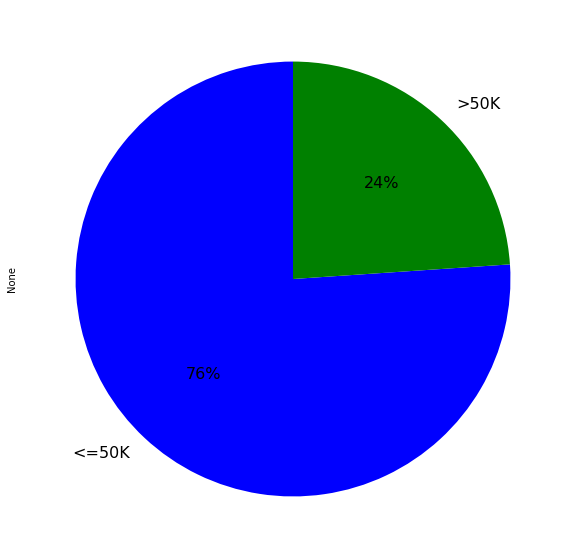

In [9]:
df_adult.groupby(['income'])\
        .size()\
        .plot(kind='pie',
              y='income',
              figsize=(15,10),
              startangle=90,
              autopct='%1.0f%%',
              colors = ['b', 'g'],
              textprops={'fontsize': 16})

<font color='blue'> Of the individuals sampled in this adult income census over 76% report <=50K in annual income, while 24% report of 50K in annual income. There is a clear imbalance in annual income. Stated as a ratio this is about 3 to 1. For 3 individuals with less than of equal to 50K in annual income, there is one with over 50K in annual income. </font>

In [10]:
#stacked bar for x-axis: gender and y-axis percentage >50K and <=50K


In [11]:
df_gender_income = df_adult.groupby(['gender', 'income']).size().unstack().reset_index()
df_gender_income

income,gender,<=50K,>50K
0,Female,14423,1769
1,Male,22732,9918


In [12]:
df_gender_income.loc[:, 'total'] = df_gender_income.loc[:, '<=50K'] + df_gender_income.loc[:, '>50K']
df_gender_income

income,gender,<=50K,>50K,total
0,Female,14423,1769,16192
1,Male,22732,9918,32650


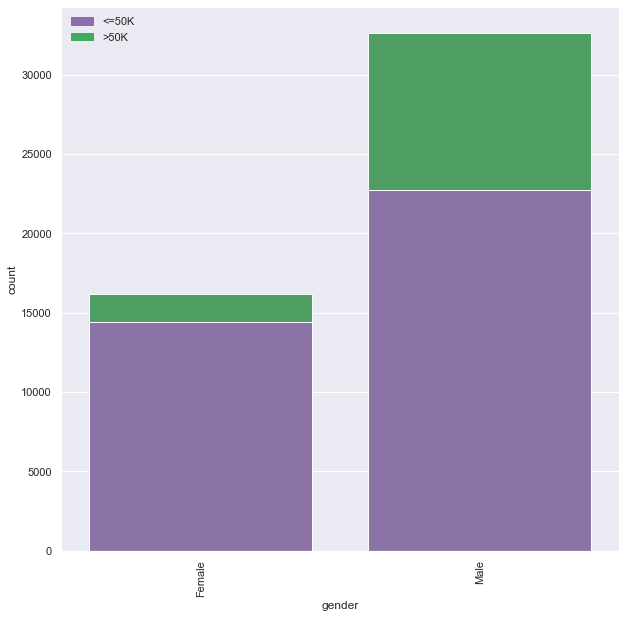

In [13]:
import matplotlib.patches as mpatches

sns.set(style="darkgrid")

plt.figure(figsize=(10, 10))

bar1 = sns.barplot(x="gender",  y="total", data=df_gender_income, color='#41ab5d')

bar2 = sns.barplot(x="gender",
                   y="<=50K",
                   data = df_gender_income,
                   color='#8c6bb1')

top_bar = mpatches.Patch(color='#8c6bb1', label='<=50K')
bottom_bar = mpatches.Patch(color='#41ab5d', label='>50K')
plt.legend(handles=[top_bar, bottom_bar], frameon=False)

plt.tick_params(axis='x', rotation=90)

plt.ylabel('count')

plt.show()

#https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

In [14]:
df_gender_income = df_adult.groupby(['gender', 'income']).size().unstack().reset_index()
df_gender_income

income,gender,<=50K,>50K
0,Female,14423,1769
1,Male,22732,9918


In [15]:
df_gender_income.loc[:, 'total'] = df_gender_income.loc[:, '<=50K'] + df_gender_income.loc[:, '>50K']
df_gender_income.loc[:, '>50K_rate'] = df_gender_income.loc[:, '>50K'] / df_gender_income.loc[:, 'total']
df_gender_income = df_gender_income.sort_values('>50K_rate', ascending=False)
df_gender_income = df_gender_income.drop(columns=['total', '>50K_rate'])

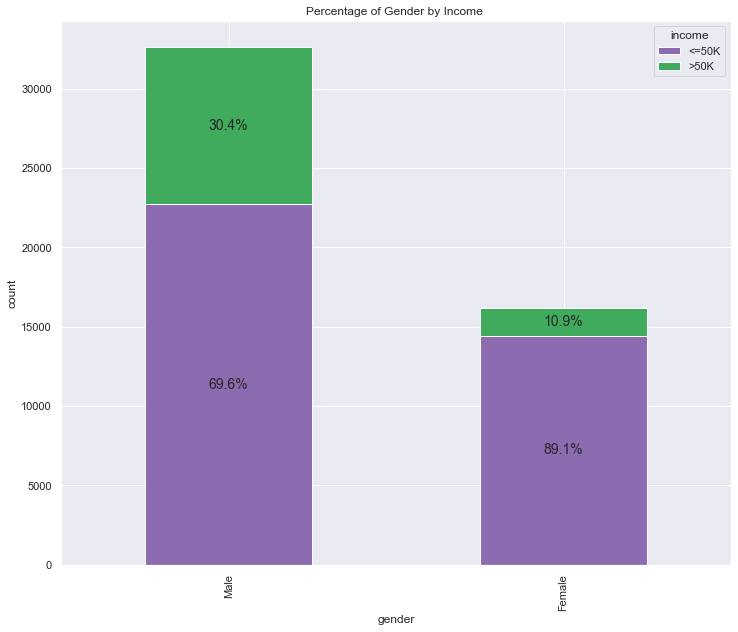

In [16]:
#plt.figure(figsize=(10, 10))

#sns.set(style="darkgrid")

df_gender_income.plot(x = 'gender',
                      kind = 'bar',
                      stacked = True,
                      title = 'Percentage of Gender by Income ',
                      mark_right = True,
                      color=['#8c6bb1', '#41ab5d'],
                      figsize=(12, 10))

df_total = df_gender_income["<=50K"] + df_gender_income[">50K"]
df_rel = df_gender_income[df_gender_income.columns[1:]].div(df_total, 0) * 100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_gender_income.iloc[:, 1:].cumsum(1)[n],
                                         df_gender_income[n], df_rel[n])):
        plt.text(i, 
                 cs - ab / 2, 
                 str(np.round(pc, 1)) + '%', va = 'center', 
                 ha = 'center', 
                 rotation = 0, 
                 fontsize = 14)
        
plt.ylabel('count')

plt.show()


<font color='blue'> Of female individuals, just 11% report >50K in annual income. Of male individuals, 30% reported >50K in annual income. This can be can be interpretted as, if selecting a female at random and a male at random, the male is approximately three times more likely to report a >50K annual income. </font>

In [17]:
df_race_income = df_adult.groupby(['race', 'income']).size().unstack().reset_index()
df_race_income

income,race,<=50K,>50K
0,Amer-Indian-Eskimo,415,55
1,Asian-Pac-Islander,1110,409
2,Black,4119,566
3,Other,356,50
4,White,31155,10607


In [18]:
df_race_income.loc[:, 'total'] = df_race_income.loc[:, '<=50K'] + df_race_income.loc[:, '>50K']
df_race_income.loc[:, '>50K_rate'] = df_race_income.loc[:, '>50K'] / df_race_income.loc[:, 'total']
df_race_income = df_race_income.sort_values('>50K_rate', ascending=False)
df_race_income = df_race_income.drop(columns=['total', '>50K_rate'])

In [19]:
df_race_income

income,race,<=50K,>50K
1,Asian-Pac-Islander,1110,409
4,White,31155,10607
3,Other,356,50
2,Black,4119,566
0,Amer-Indian-Eskimo,415,55


In [20]:
!pip install adjustText

In [21]:
from adjustText import adjust_text


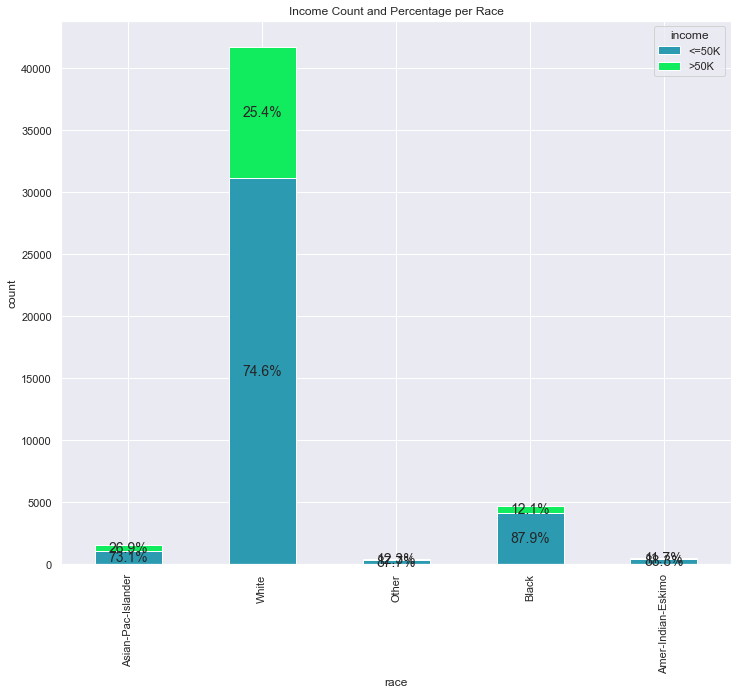

In [22]:
#plt.figure(figsize=(10, 10))

#sns.set(style="darkgrid")

df_race_income.plot(x = 'race',
                    kind = 'bar',
                    stacked = True,
                    title = 'Income Count and Percentage per Race',
                    mark_right = True,
                    color=['#2c9bb2', '#11eb5e'],
                    figsize=(12, 10))

df_total = df_race_income["<=50K"] + df_race_income[">50K"]
df_rel = df_race_income[df_race_income.columns[1:]].div(df_total, 0) * 100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_race_income.iloc[:, 1:].cumsum(1)[n],
                                         df_race_income[n], df_rel[n])):
        text = plt.text(i, 
                        cs - ab / 2, 
                        str(np.round(pc, 1)) + '%', va = 'center', 
                        ha = 'center', 
                        rotation = 0, 
                        fontsize = 14)
#adjust_text(text)
        
plt.ylabel('count')

plt.show()



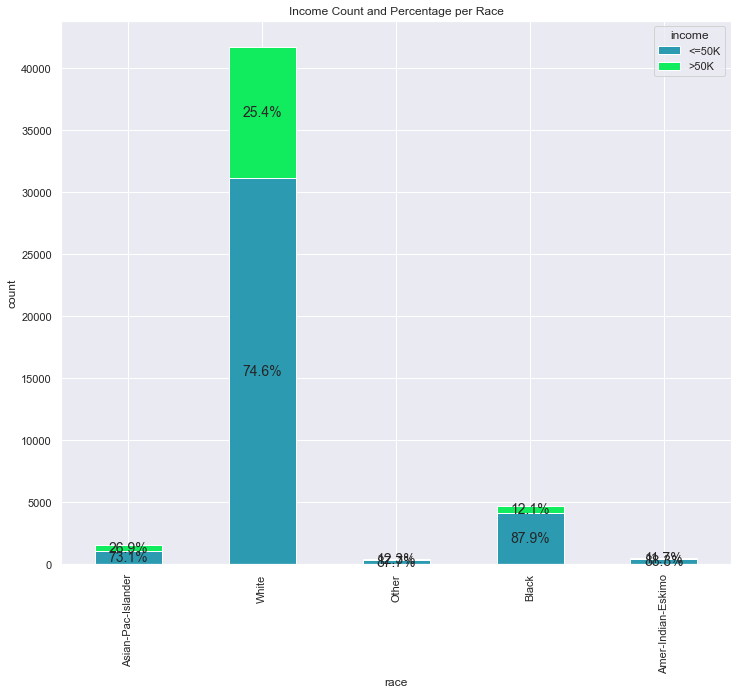

In [23]:
df_race_income.plot(x = 'race',
                    kind = 'bar',
                    stacked = True,
                    title = 'Income Count and Percentage per Race',
                    mark_right = True,
                    color=['#2c9bb2', '#11eb5e'],
                    figsize=(12, 10))

df_total = df_race_income["<=50K"] + df_race_income[">50K"]
df_rel = df_race_income[df_race_income.columns[1:]].div(df_total, 0) * 100



text = [plt.text(i, 
                 cs - ab / 2, 
                 str(np.round(pc, 1)) + '%', va = 'center', 
                 ha = 'center', 
                 rotation = 0, 
                 fontsize = 14)
        for n in df_rel \
        for i, (cs, ab, pc) in enumerate(zip(df_race_income.iloc[:, 1:].cumsum(1)[n],\
                                         df_race_income[n], df_rel[n]))]

#adjust_text(text)
        
plt.ylabel('count')

plt.show()




<font color='blue'> By race, Asian Pacific Islander and White have the highest proportion of individual with a >50K annual income. By race, their proportion of >50 annual income individuals is  approximately double that of other, blacks, and American Indian Eskimo individuals.</font>

In [24]:
df_occupation_income = df_adult.groupby(['occupation', 'income']).size().unstack().reset_index()
df_occupation_income

income,occupation,<=50K,>50K
0,?,2544,265
1,Adm-clerical,4843,768
2,Armed-Forces,10,5
3,Craft-repair,4729,1383
4,Exec-managerial,3178,2908
5,Farming-fishing,1317,173
6,Handlers-cleaners,1934,138
7,Machine-op-inspct,2650,372
8,Other-service,4719,204
9,Priv-house-serv,239,3


In [25]:
df_occupation_income.loc[:, 'total'] = df_occupation_income.loc[:, '<=50K'] + \
                                       df_occupation_income.loc[:, '>50K']
df_occupation_income.loc[:, '>50K_rate'] = df_occupation_income.loc[:, '>50K'] /\
                                           df_occupation_income.loc[:, 'total']
df_occupation_income = df_occupation_income.sort_values(['>50K_rate', 'total'], ascending=False)
df_occupation_income = df_occupation_income.drop(columns=['total', '>50K_rate'])
df_occupation_income

income,occupation,<=50K,>50K
4,Exec-managerial,3178,2908
10,Prof-specialty,3388,2784
2,Armed-Forces,10,5
11,Protective-serv,675,308
13,Tech-support,1026,420
12,Sales,4029,1475
3,Craft-repair,4729,1383
14,Transport-moving,1874,481
1,Adm-clerical,4843,768
7,Machine-op-inspct,2650,372


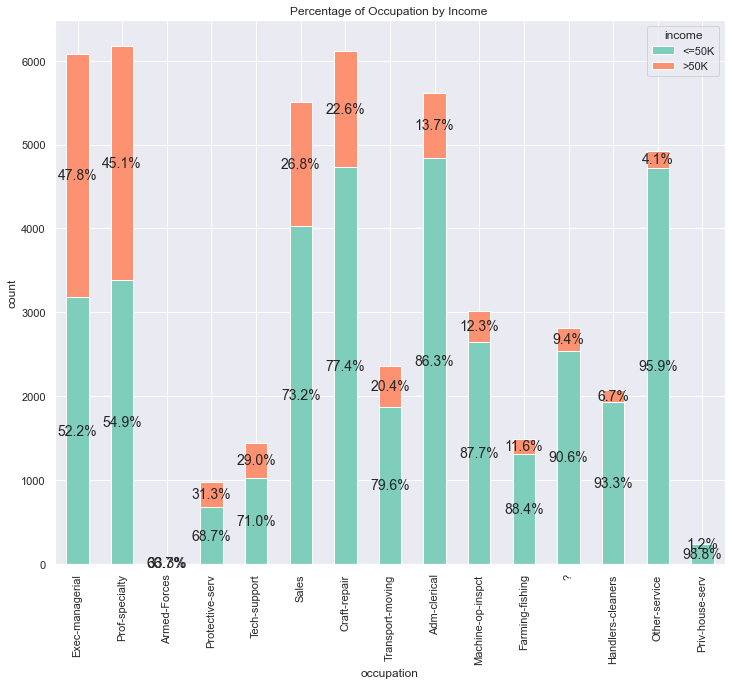

In [26]:
#plt.figure(figsize=(10, 10))

#sns.set(style="darkgrid")

df_occupation_income.plot(x = 'occupation',
                      kind = 'bar',
                      stacked = True,
                      title = 'Percentage of Occupation by Income ',
                      mark_right = True,
                      color=['#7fcdbb', '#fc9272'],
                      figsize=(12, 10))

df_total = df_occupation_income["<=50K"] + df_occupation_income[">50K"]
df_rel = df_occupation_income[df_occupation_income.columns[1:]].div(df_total, 0) * 100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_occupation_income.iloc[:, 1:].cumsum(1)[n],
                                         df_occupation_income[n], df_rel[n])):
        plt.text(i, 
                 cs - ab / 2, 
                 str(np.round(pc, 1)) + '%', va = 'center', 
                 ha = 'center', 
                 rotation = 0, 
                 fontsize = 14)
        
plt.ylabel('count')

plt.show()



<font color='blue'> By occupation, the individuals of executive managerial and proffesion specialty reported the highest proportion of >50K annual income individuals. handler-cleaner, other service, and private house service occupation individuals reported with the lowest proportion of >50K annual income individuals. </font>

In [27]:
df_workclass_income = df_adult.groupby(['workclass', 'income']).size().unstack().reset_index().fillna(0)
df_workclass_income

income,workclass,<=50K,>50K
0,?,2534.0,265.0
1,Federal-gov,871.0,561.0
2,Local-gov,2209.0,927.0
3,Never-worked,10.0,0.0
4,Private,26519.0,7387.0
5,Self-emp-inc,757.0,938.0
6,Self-emp-not-inc,2785.0,1077.0
7,State-gov,1451.0,530.0
8,Without-pay,19.0,2.0


In [28]:
df_workclass_income.loc[:, 'total'] = df_workclass_income.loc[:, '<=50K'] + \
                                       df_workclass_income.loc[:, '>50K']
df_workclass_income.loc[:, '>50K_rate'] = df_workclass_income.loc[:, '>50K'] /\
                                           df_workclass_income.loc[:, 'total']
df_workclass_income = df_workclass_income.sort_values(['>50K_rate', 'total'], ascending=False)
df_workclass_income = df_workclass_income.drop(columns=['total', '>50K_rate'])
df_workclass_income

income,workclass,<=50K,>50K
5,Self-emp-inc,757.0,938.0
1,Federal-gov,871.0,561.0
2,Local-gov,2209.0,927.0
6,Self-emp-not-inc,2785.0,1077.0
7,State-gov,1451.0,530.0
4,Private,26519.0,7387.0
8,Without-pay,19.0,2.0
0,?,2534.0,265.0
3,Never-worked,10.0,0.0


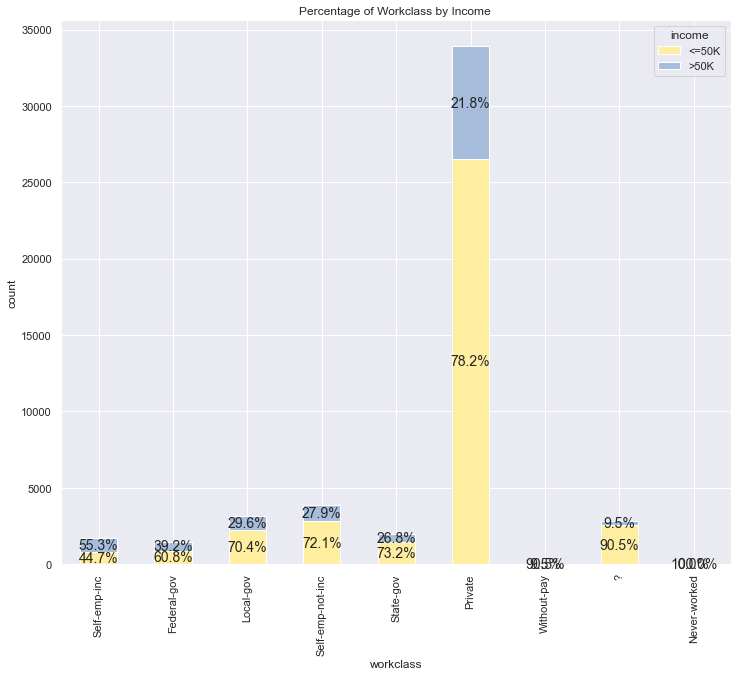

In [29]:
#plt.figure(figsize=(10, 10))

#sns.set(style="darkgrid")

df_workclass_income.plot(x = 'workclass',
                      kind = 'bar',
                      stacked = True,
                      title = 'Percentage of Workclass by Income ',
                      mark_right = True,
                      color=['#ffeda0', '#a6bddb'],
                      figsize=(12, 10))

df_total = df_workclass_income["<=50K"] + df_workclass_income[">50K"]
df_rel = df_workclass_income[df_workclass_income.columns[1:]].div(df_total, 0) * 100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_workclass_income.iloc[:, 1:].cumsum(1)[n],
                                         df_workclass_income[n], df_rel[n])):
        plt.text(i, 
                 cs - ab / 2, 
                 str(np.round(pc, 1)) + '%', va = 'center', 
                 ha = 'center', 
                 rotation = 0, 
                 fontsize = 14)
        
plt.ylabel('count')

plt.show()




<font color='blue'> Of the work classes, the individuals of the private workclass group make up the highest count work class group. </font>

<font color='blue'> The work class group self employeed and incorporated has the highest proportion of individuals with >50K in annual income at 55%</font>

<font color='blue'> The work class group federal government follows with a proportion of 39% of individuals with >50K in annual income.</font>

<font color='blue'> The the work class groups with the lowest proportion of >50K in annual income individuals are the reported without pay, not specified, and never worked groups. </font>



In [30]:
df_marital_status_income = df_adult.groupby(['marital-status', 'income']).size().unstack().reset_index()
df_marital_status_income

income,marital-status,<=50K,>50K
0,Divorced,5962,671
1,Married-AF-spouse,23,14
2,Married-civ-spouse,12395,9984
3,Married-spouse-absent,570,58
4,Never-married,15384,733
5,Separated,1431,99
6,Widowed,1390,128


In [31]:
df_marital_status_income.loc[:, 'total'] = df_marital_status_income.loc[:, '<=50K'] + \
                                       df_marital_status_income.loc[:, '>50K']
df_marital_status_income.loc[:, '>50K_rate'] = df_marital_status_income.loc[:, '>50K'] /\
                                           df_marital_status_income.loc[:, 'total']
df_marital_status_income = df_marital_status_income.sort_values(['>50K_rate', 'total'], ascending=False)
df_marital_status_income = df_marital_status_income.drop(columns=['total', '>50K_rate'])
df_marital_status_income

income,marital-status,<=50K,>50K
2,Married-civ-spouse,12395,9984
1,Married-AF-spouse,23,14
0,Divorced,5962,671
3,Married-spouse-absent,570,58
6,Widowed,1390,128
5,Separated,1431,99
4,Never-married,15384,733


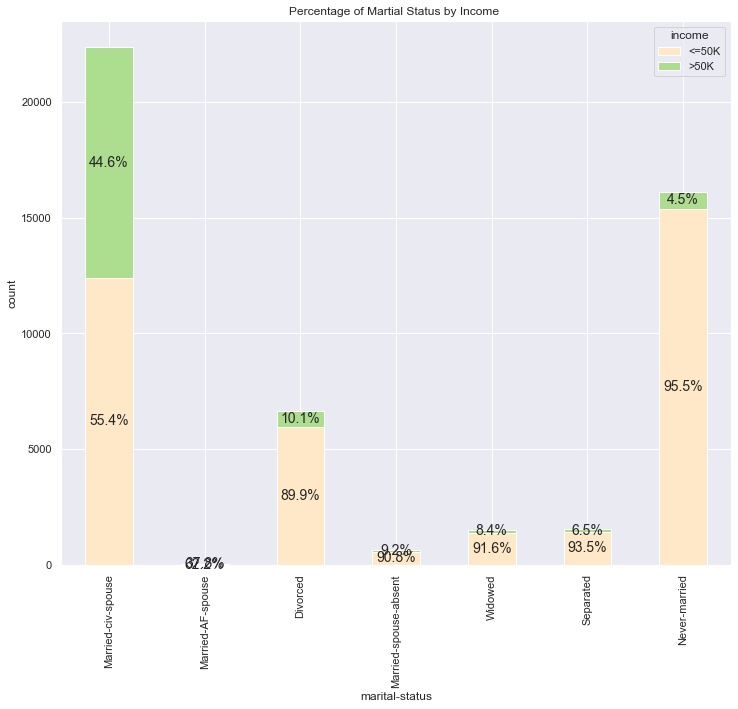

In [32]:
#plt.figure(figsize=(10, 10))

#sns.set(style="darkgrid")

df_marital_status_income.plot(x = 'marital-status',
                      kind = 'bar',
                      stacked = True,
                      title = 'Percentage of Martial Status by Income ',
                      mark_right = True,
                      color=['#fee8c8', '#addd8e'],
                      figsize=(12, 10))

df_total = df_marital_status_income["<=50K"] + df_marital_status_income[">50K"]
df_rel = df_marital_status_income[df_marital_status_income.columns[1:]].div(df_total, 0) * 100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_marital_status_income.iloc[:, 1:].cumsum(1)[n],
                                         df_marital_status_income[n], df_rel[n])):
        plt.text(i, 
                 cs - ab / 2, 
                 str(np.round(pc, 1)) + '%', va = 'center', 
                 ha = 'center', 
                 rotation = 0, 
                 fontsize = 14)
        
plt.ylabel('count')

plt.show()





<font color='blue'> The most popular marital status groups were of the married civilian spouse, never married, and divorced groups. </font>

<font color='blue'> Of these marital status groups, the married civial spouse group reported the highest proportion of individual with a >50K annual income at 45%. </font>

<font color='blue'> The maritial status group with the second highest proportion of individuals with a >50K annual income reported was the married air force spouse group at ??%. </font>

<font color='blue'> The maritial status group with the lowest proportion of individuals with a >50K annual income reported was the never-married group at 5%. </font>

In [33]:
df_relationship_income = df_adult.groupby(['relationship', 'income']).size().unstack().reset_index()
df_relationship_income

income,relationship,<=50K,>50K
0,Husband,10870,8846
1,Not-in-family,11307,1276
2,Other-relative,1454,52
3,Own-child,7470,111
4,Unmarried,4816,309
5,Wife,1238,1093


In [34]:
df_relationship_income.loc[:, 'total'] = df_relationship_income.loc[:, '<=50K'] + \
                                       df_relationship_income.loc[:, '>50K']
df_relationship_income.loc[:, '>50K_rate'] = df_relationship_income.loc[:, '>50K'] /\
                                           df_relationship_income.loc[:, 'total']
df_relationship_income = df_relationship_income.sort_values(['>50K_rate', 'total'], ascending=False)
df_relationship_income = df_relationship_income.drop(columns=['total', '>50K_rate'])
df_relationship_income

income,relationship,<=50K,>50K
5,Wife,1238,1093
0,Husband,10870,8846
1,Not-in-family,11307,1276
4,Unmarried,4816,309
2,Other-relative,1454,52
3,Own-child,7470,111


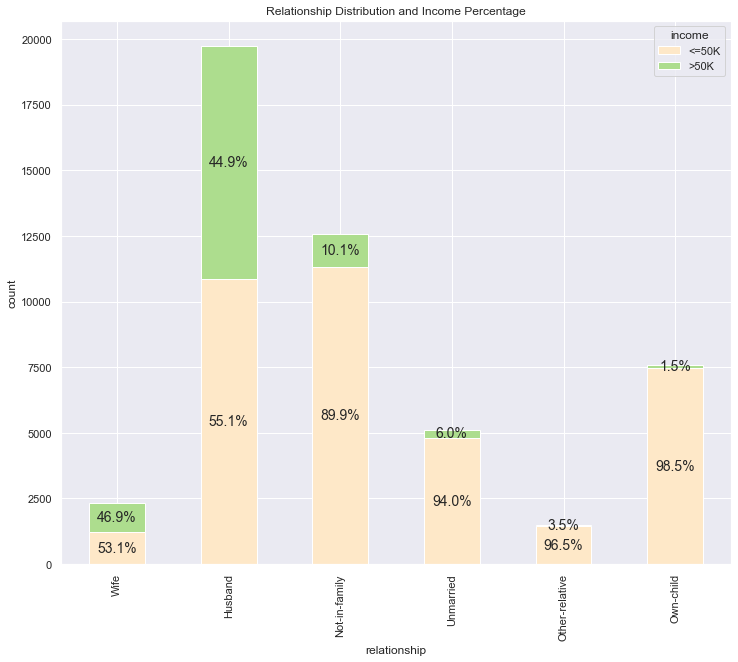

In [35]:


df_relationship_income.plot(x = 'relationship',
                      kind = 'bar',
                      stacked = True,
                      title = 'Relationship Distribution and Income Percentage',
                      mark_right = True,
                      color=['#fee8c8', '#addd8e'],
                      figsize=(12, 10))

df_total = df_relationship_income["<=50K"] + df_relationship_income[">50K"]
df_rel = df_relationship_income[df_relationship_income.columns[1:]].div(df_total, 0) * 100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_relationship_income.iloc[:, 1:].cumsum(1)[n],
                                         df_relationship_income[n], df_rel[n])):
        plt.text(i, 
                 cs - ab / 2, 
                 str(np.round(pc, 1)) + '%', va = 'center', 
                 ha = 'center', 
                 rotation = 0, 
                 fontsize = 14)
        
plt.ylabel('count')

plt.show()






<font color='blue'> Individuals in the relationship (to others) group reported as wife had the highest proportion of individuals with an annual income >50K at 47%.</font>

<font color='blue'> The next relationshp group husband had the second highest proportino of individuals with an annual income >50K at 45%</font>

<font color='blue'> Relationship groups with the lowest proportion of individuals reporting a >50K annual income include unmarried, other-relative, and own-child at 6%, 3.5%, and 1.5% respectively. </font>


In [36]:
df_age_count = df_adult.value_counts('age').reset_index().rename(columns={0:'count'})
p(df_age_count)

(74, 2)


,age,count
0,36,1348
1,35,1337
2,33,1335
3,23,1329
4,31,1325
69,88,6
70,85,5
71,87,3
72,89,2
73,86,1


<AxesSubplot:xlabel='age', ylabel='count'>

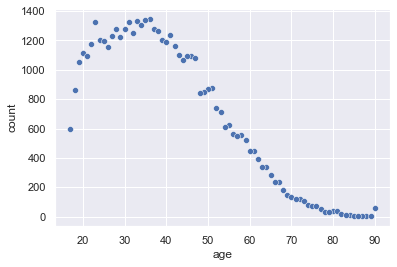

In [37]:
sns.scatterplot(x='age', y='count', data=df_age_count)

<font color='blue'> the most popular age to be working is from approximately 19 to 47 years old inclusive. </font>

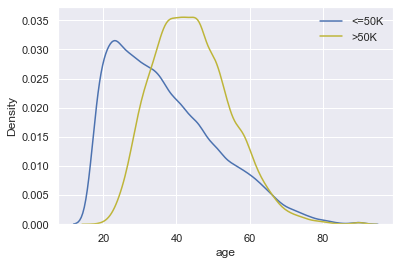

In [38]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '<=50K', :]['age'], shade=False, color="b", label='<=50K')
#https://htmlcolorcodes.com/color-picker/

fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['age'], shade=False, color="#BEB539", label='>50K')

#https://stackoverflow.com/questions/68096271/how-to-color-different-seaborn-kdeplots-in-one-figure

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


<font color='blue'> Kernel density estimate plots for individuals by age with <=50K in annual income (in blue) and >50K in annual income (in dark yellow) shows the >50K in annual income group has a high count around age 40 relative to other ages. </font>

([<matplotlib.axis.XTick at 0x7f82220aa1c0>,
 [Text(0, 0, '17'),
  Text(1, 0, '18'),
  Text(2, 0, '19'),
  Text(3, 0, '20'),
  Text(4, 0, '21'),
  Text(5, 0, '22'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '25'),
  Text(9, 0, '26'),
  Text(10, 0, '27')])

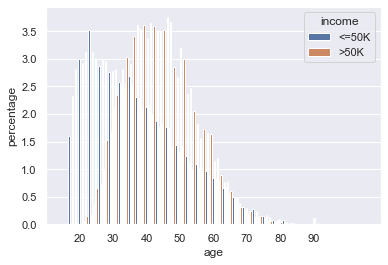

In [39]:
age_counts = (df_adult.groupby(['income'])['age']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('age'))
p = sns.barplot(x="age", y="percentage", hue="income", data=age_counts)
plt.xticks([-7, 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],)

In [40]:
bins = [17, 19, 29, 39, 49, 59, 69, 79, 89, 99]
df_adult['age_bins'] = pd.cut(df_adult['age'], 
                              bins=bins, 
                              labels=['17-19', '20-29', '30-39',
                                      '40-49', '50-59', '60-69',
                                      '70-79', '80-89', '90-99'])
df_adult.head(11)

#https://stackoverflow.com/questions/45273731/binning-a-column-with-python-pandas

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bins
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,20-29
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,30-39
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,20-29
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,40-49
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,17-19
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,30-39
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K,20-29
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,60-69
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,20-29
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,50-59


In [41]:
df_adult_age_bins_income = df_adult.groupby('age_bins')['income'].value_counts().unstack().reset_index()
df_adult_age_bins_income

income,age_bins,<=50K,>50K
0,17-19,1912,3
1,20-29,11262,743
2,30-39,9468,3461
3,40-49,6738,3986
4,50-59,4110,2509
5,60-69,2245,809
6,70-79,668,147
7,80-89,115,16
8,90-99,42,13


In [42]:
df_adult_age_bins_income.loc[:, '>_<=_50K_ratio'] = df_adult_age_bins_income.loc[:, '>50K'] / df_adult_age_bins_income.loc[:, '<=50K']
df_adult_age_bins_income

income,age_bins,<=50K,>50K,>_<=_50K_ratio
0,17-19,1912,3,0.001569
1,20-29,11262,743,0.065974
2,30-39,9468,3461,0.365547
3,40-49,6738,3986,0.591570
4,50-59,4110,2509,0.610462
5,60-69,2245,809,0.360356
6,70-79,668,147,0.220060
7,80-89,115,16,0.139130
8,90-99,42,13,0.309524


In [43]:
df_adult_age_bins_income.loc[:, 'total'] = df_adult_age_bins_income.loc[:, '>50K'] + \
                                           df_adult_age_bins_income.loc[:, '<=50K']

In [44]:
df_adult_age_bins_income.loc[:, '>50K_rate'] = df_adult_age_bins_income.loc[:, '>50K'] / \
                                               df_adult_age_bins_income.loc[:, 'total']

In [45]:
df_adult_age_bins_income

income,age_bins,<=50K,>50K,>_<=_50K_ratio,total,>50K_rate
0,17-19,1912,3,0.001569,1915,0.001567
1,20-29,11262,743,0.065974,12005,0.061891
2,30-39,9468,3461,0.365547,12929,0.267693
3,40-49,6738,3986,0.591570,10724,0.371690
4,50-59,4110,2509,0.610462,6619,0.379060
5,60-69,2245,809,0.360356,3054,0.264898
6,70-79,668,147,0.220060,815,0.180368
7,80-89,115,16,0.139130,131,0.122137
8,90-99,42,13,0.309524,55,0.236364


Text(0, 0.5, '>50K to <=50K Ratio')

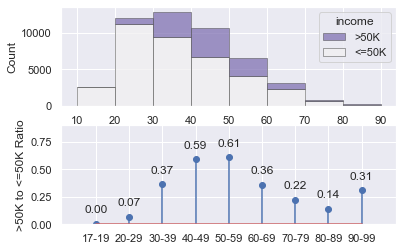

In [46]:
df_adult


# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(nrows=2)
sns.histplot(
    data=df_adult,
    x="age", hue="income",
    hue_order=['>50K','<=50K'], #https://seaborn.pydata.org/generated/seaborn.histplot.html
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    bins=[10, 20, 30, 40, 50, 60, 70, 80, 90],
    ax=ax1)

plt.margins(x=.13)


plt.stem(df_adult_age_bins_income.age_bins, df_adult_age_bins_income.loc[:, '>_<=_50K_ratio'])

for i, v in enumerate(df_adult_age_bins_income.loc[:, '>_<=_50K_ratio']):
    ax2.text(i, v+.1, "%.2f" %v, ha="center")

ax2.set_ylim(0,.9)
ax2.set_ylabel('>50K to <=50K Ratio')


<font color='blue'>
The age group of 31-40 has the most number of individuals with an income. However, it is the age group of 41-50 that has the highest ratio of individuals with >50K to <=50K in annual income. This also means the 41-50 age group has the largest percentage with an annual income >50K.</font>

In [47]:
#percentage >50K rate and >50K to <=50K ratio 
#x / (x+y) * f(x,y) = x / y 

#f(x,y) = x/y + 1



<font color='purple'> reductions in the the >50K rate per age group following 41-50 possibly suggestions that age and having had more time to acquire knowledge are not major factors for those with a >50K income. Also, it may suggestion those in the 41-50 age group with >50K in annual income are retiring from a prosperious career and are therefore not found in the 51-60 age group and/or those to follow. </font>

<ipython-input-48-c5d1a9082300>:29: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.annotate(


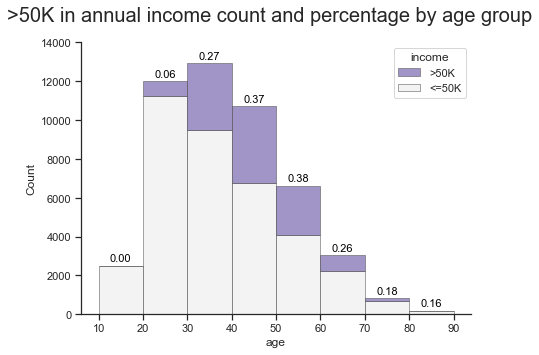

In [48]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

ax1 = sns.histplot(
    data=df_adult,
    x="age", hue="income",
    hue_order=['>50K','<=50K'], #https://seaborn.pydata.org/generated/seaborn.histplot.html
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    bins=[10, 20, 30, 40, 50, 60, 70, 80, 90]
)

for p, p2 in zip(ax1.patches[8:16], ax1.patches[0:8]):
    
    total = p.get_height() + p2.get_height()
    
    greater50K_count = p.get_height()
    
    greater50K_percentage = greater50K_count / total
    
    ax1.annotate(
        s=f"{greater50K_percentage:1.2f}",
        xy=(p.get_x() + p.get_width() / 2., total), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )

ax1.set_ylim([0, 14000])

plt.suptitle('>50K in annual income count and percentage by age group', 
             size = 20);

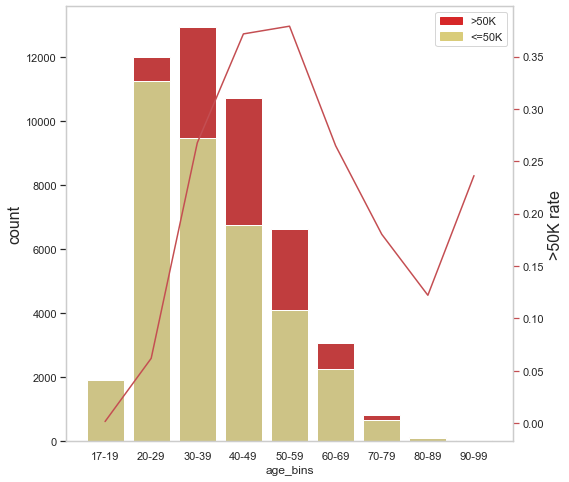

In [49]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(8, 8))

bar1 = sns.barplot(x="age_bins",  y="total", data=df_adult_age_bins_income, color='tab:red')

bar2 = sns.barplot(x="age_bins", y="<=50K", data=df_adult_age_bins_income, estimator=sum, ci=None,  color='#D9CC7A')

bar2.set_ylabel('count', fontsize=16)

top_bar = mpatches.Patch(color='tab:red', label='>50K')
bottom_bar = mpatches.Patch(color='#D9CC7A', label='<=50K')
plt.legend(handles=[top_bar, bottom_bar])

ax2 = bar1.twinx()
color = 'r'

ax2.set_ylabel('>50K rate', fontsize=16)
ax2 = sns.lineplot(x='age_bins', y='>50K_rate', data = df_adult_age_bins_income, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

#https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

plt.show()

<font color='blue'> starting from the age group 17-19 up to the 40-49 age group, the proportion of those working with a >50K annual income is increasing. In the following 50-59 age group, the proportion increases slightly, but is basically leveling off and a decline is seen in the 60-69 age group. Declines in the proportion making a >50K income are seen til the 80-89 age group. 

By the 90-99 age group, although a small sample size, we see an increase in the proportion with a >50K annual income.
</font>

In [50]:
df_age_education_income = df_adult.groupby(['age_bins', 'education'])['income']\
                                                .value_counts()\
                                                .unstack()\
                                                .reset_index()
df_age_education_income.head(11)

income,age_bins,education,<=50K,>50K
0,17-19,10th,77.0,NaN
1,17-19,11th,324.0,NaN
2,17-19,12th,127.0,1.0
3,17-19,1st-4th,3.0,NaN
4,17-19,5th-6th,8.0,NaN
5,17-19,7th-8th,18.0,1.0
6,17-19,9th,24.0,NaN
7,17-19,Assoc-acdm,2.0,NaN
8,17-19,Assoc-voc,5.0,NaN
9,17-19,Bachelors,2.0,NaN


In [51]:
df_age_education_income.loc[:, '>50K'] = df_age_education_income.loc[:, '>50K'].fillna(0)
df_age_education_income.head(11)

income,age_bins,education,<=50K,>50K
0,17-19,10th,77.0,0.0
1,17-19,11th,324.0,0.0
2,17-19,12th,127.0,1.0
3,17-19,1st-4th,3.0,0.0
4,17-19,5th-6th,8.0,0.0
5,17-19,7th-8th,18.0,1.0
6,17-19,9th,24.0,0.0
7,17-19,Assoc-acdm,2.0,0.0
8,17-19,Assoc-voc,5.0,0.0
9,17-19,Bachelors,2.0,0.0


In [52]:
df_age_education_income.loc[:, 'total'] = df_age_education_income.loc[:, '<=50K'] + \
                                          df_age_education_income.loc[:, '>50K']
df_age_education_income.head(11)

income,age_bins,education,<=50K,>50K,total
0,17-19,10th,77.0,0.0,77.0
1,17-19,11th,324.0,0.0,324.0
2,17-19,12th,127.0,1.0,128.0
3,17-19,1st-4th,3.0,0.0,3.0
4,17-19,5th-6th,8.0,0.0,8.0
5,17-19,7th-8th,18.0,1.0,19.0
6,17-19,9th,24.0,0.0,24.0
7,17-19,Assoc-acdm,2.0,0.0,2.0
8,17-19,Assoc-voc,5.0,0.0,5.0
9,17-19,Bachelors,2.0,0.0,2.0


In [53]:
df_age_education_income.loc[:, '>50K_rate'] = df_age_education_income.loc[:, '>50K'] \
                                              / df_age_education_income.loc[:, 'total']
df_age_education_income.head(11)

income,age_bins,education,<=50K,>50K,total,>50K_rate
0,17-19,10th,77.0,0.0,77.0,0.000000
1,17-19,11th,324.0,0.0,324.0,0.000000
2,17-19,12th,127.0,1.0,128.0,0.007812
3,17-19,1st-4th,3.0,0.0,3.0,0.000000
4,17-19,5th-6th,8.0,0.0,8.0,0.000000
5,17-19,7th-8th,18.0,1.0,19.0,0.052632
6,17-19,9th,24.0,0.0,24.0,0.000000
7,17-19,Assoc-acdm,2.0,0.0,2.0,0.000000
8,17-19,Assoc-voc,5.0,0.0,5.0,0.000000
9,17-19,Bachelors,2.0,0.0,2.0,0.000000


In [54]:
df_age_education_income.loc[:, '<=50K_rate'] =  df_age_education_income.loc[:, '<=50K'] \
                                              / df_age_education_income.loc[:, 'total']
df_age_education_income.head(11)

income,age_bins,education,<=50K,>50K,total,>50K_rate,<=50K_rate
0,17-19,10th,77.0,0.0,77.0,0.000000,1.000000
1,17-19,11th,324.0,0.0,324.0,0.000000,1.000000
2,17-19,12th,127.0,1.0,128.0,0.007812,0.992188
3,17-19,1st-4th,3.0,0.0,3.0,0.000000,1.000000
4,17-19,5th-6th,8.0,0.0,8.0,0.000000,1.000000
5,17-19,7th-8th,18.0,1.0,19.0,0.052632,0.947368
6,17-19,9th,24.0,0.0,24.0,0.000000,1.000000
7,17-19,Assoc-acdm,2.0,0.0,2.0,0.000000,1.000000
8,17-19,Assoc-voc,5.0,0.0,5.0,0.000000,1.000000
9,17-19,Bachelors,2.0,0.0,2.0,0.000000,1.000000


In [55]:
df_education_educational_num = df_adult.loc[:, ['education', 'educational-num']].drop_duplicates().sort_values('educational-num')
df_education_educational_num

,education,educational-num
779,Preschool,1
323,1st-4th,2
37,5th-6th,3
9,7th-8th,4
54,9th,5
5,10th,6
0,11th,7
173,12th,8
1,HS-grad,9
3,Some-college,10


In [56]:
df_age_education_income = pd.merge(df_age_education_income, df_education_educational_num, on='education')
df_age_education_income.head(11)

,age_bins,education,<=50K,>50K,total,>50K_rate,<=50K_rate,educational-num
0,17-19,10th,77.0,0.0,77.0,0.000000,1.000000,6
1,20-29,10th,263.0,3.0,266.0,0.011278,0.988722,6
2,30-39,10th,253.0,15.0,268.0,0.055970,0.944030,6
3,40-49,10th,154.0,21.0,175.0,0.120000,0.880000,6
4,50-59,10th,196.0,35.0,231.0,0.151515,0.848485,6
5,60-69,10th,117.0,12.0,129.0,0.093023,0.906977,6
6,70-79,10th,38.0,0.0,38.0,0.000000,1.000000,6
7,80-89,10th,4.0,1.0,5.0,0.200000,0.800000,6
8,90-99,10th,2.0,0.0,2.0,0.000000,1.000000,6
9,17-19,11th,324.0,0.0,324.0,0.000000,1.000000,7


In [57]:
df_age_education_income = df_age_education_income.sort_values(['age_bins', 'educational-num'])

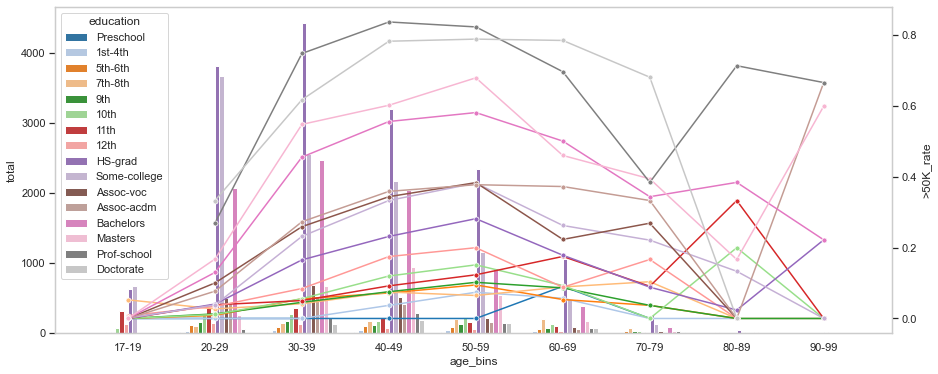

In [58]:
#sns.color_palette("rocket_r", as_cmap=True)

fig, ax = plt.subplots(figsize=(15,6))

ax2 = ax.twinx()

g = sns.barplot(x='age_bins',
                   y='total',
                   hue='education',
                   data=df_age_education_income,
                   ax=ax,
                   palette="tab20")

g = sns.lineplot(x='age_bins',  
                 y='>50K_rate', 
                 hue='education', 
                 data=df_age_education_income, 
                 ax=ax2,
                 marker='.', 
                 markersize=10,
                 legend=None,
                 palette='tab20')
#https://stackoverflow.com/questions/55618166/seaborn-multiaxis-graph-assigning-different-colors-to-the-same-shared-category-h

plt.tick_params(axis='x', rotation=45)

plt.xticks(ha="right")

plt.tick_params(bottom=False)

plt.tick_params(left=False)

#https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots

<font color='red'> grab top 10 'education's by count </font>

<font color='blue'> <font>

<font color='blue'> AAA</font>

In [59]:
import matplotlib.patches as mpatches

df_education_income = df_adult.groupby(['education'])['income'].value_counts().unstack().reset_index()

df_education_income.loc[:, 'total'] = \
df_education_income.loc[:, '<=50K'].values + df_education_income.loc[:, '>50K']

df_education_income.loc[:, '>50K_rate'] = \
df_education_income.loc[:, '>50K'].values / df_education_income.loc[:, 'total']

df_education_income_total = df_education_income.sort_values(['>50K_rate', 'total'], ascending=False)

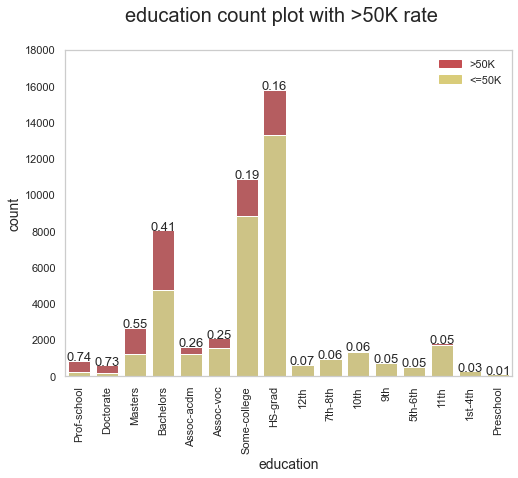

In [60]:
plt.figure(figsize=(8, 6))

splot = sns.barplot(x="education",  y="total", data=df_education_income_total, color='r')

bar2 = sns.barplot(x="education",
                   y="<=50K",
                   data = df_education_income_total,
                   color='#D9CC7A')

top_bar = mpatches.Patch(color='r', label='>50K')
bottom_bar = mpatches.Patch(color='#D9CC7A', label='<=50K')

#https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot


for p, rate in zip(splot.patches, df_education_income_total.loc[:, '>50K_rate']):
    splot.annotate(format(rate, '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + 833), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
#https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

plt.xlabel("education", size=14)

plt.legend(handles=[top_bar, bottom_bar], frameon=False)

plt.tick_params(axis='x', rotation=90)

plt.ylabel('count', size=14)

splot.set_ylim(0,18000)

plt.suptitle('education count plot with >50K rate', 
             size = 20);



<font color='blue'> From 12th grade education to a high school education, the data suggests there is an approximate doubling in the proportion with a >50K annual income at .07 and .16 respectively. </font>


<font color='blue'> Achieving some college, a vocational associates, or an academic associates each shows a higher proportion of individuals a with annual income >50K.</font>

<font color='blue'> There is a near triplinging in the proportion of individuals with a bachelors as their highest level of education accomplished compared to individuals with high school as their highest level of education accomplish at .41 and .16 respectively. </font>


<font color='blue'> The highest proportion of individuals with a >50K annual income by highest level of education achieved goes to individuals with a professional school completed.</font>



In [61]:
df_education_income_total.head(11)

income,education,<=50K,>50K,total,>50K_rate
14,Prof-school,217,617,834,0.739808
10,Doctorate,163,431,594,0.725589
12,Masters,1198,1459,2657,0.549116
9,Bachelors,4712,3313,8025,0.412835
7,Assoc-acdm,1188,413,1601,0.257964
8,Assoc-voc,1539,522,2061,0.253275
15,Some-college,8815,2063,10878,0.189649
11,HS-grad,13281,2503,15784,0.158578
2,12th,609,48,657,0.073059
5,7th-8th,893,62,955,0.064921


In [62]:
df_education_income_total = df_education_income_total.reset_index(drop=True)
df_education_income_total

income,education,<=50K,>50K,total,>50K_rate
0,Prof-school,217,617,834,0.739808
1,Doctorate,163,431,594,0.725589
2,Masters,1198,1459,2657,0.549116
3,Bachelors,4712,3313,8025,0.412835
4,Assoc-acdm,1188,413,1601,0.257964
5,Assoc-voc,1539,522,2061,0.253275
6,Some-college,8815,2063,10878,0.189649
7,HS-grad,13281,2503,15784,0.158578
8,12th,609,48,657,0.073059
9,7th-8th,893,62,955,0.064921


In [63]:
df_education_income_total.columns.name = None


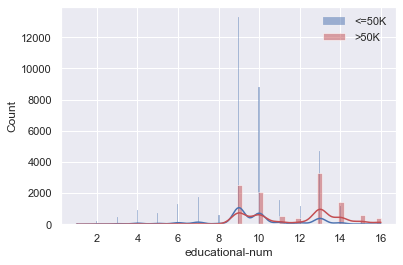

In [64]:
sns.set(style="darkgrid")

fig = sns.histplot(df_adult.loc[df_adult.income == '<=50K', :]['educational-num'],
                   color="b",
                   label='<=50K',
                   kde=True)

fig = sns.histplot(df_adult.loc[df_adult.income == '>50K', :]['educational-num'], 
                   color="r", 
                   label='>50K', 
                   kde=True)

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables



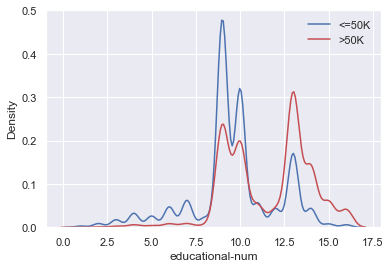

In [65]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '<=50K', :]['educational-num'], shade=False, color="b", label='<=50K')
fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['educational-num'], shade=False, color="r", label='>50K')

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


<font color='blue'> The KDE plot of individuals with greater than 50K in annual income and those with not shows there is a higher proportion of the >50K in annual income group with a larger educational-num than the <=50K in annual income group. Also, a higher proportion of the  <=50K in annual income group with lower (i.e. less than 11) educational-num than the >50K in annual income group. </font>

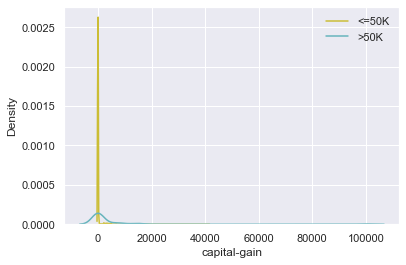

In [66]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '<=50K', :]['capital-gain'], shade=False, color="#CBBD35", label='<=50K')
#https://htmlcolorcodes.com/color-picker/

fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['capital-gain'], shade=False, color="#66B4BC", label='>50K')

#https://stackoverflow.com/questions/68096271/how-to-color-different-seaborn-kdeplots-in-one-figure

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


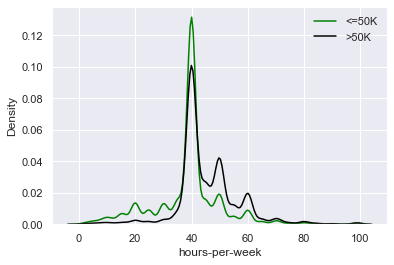

In [67]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '<=50K', :]['hours-per-week'], shade=False, color="green", label='<=50K')
#https://htmlcolorcodes.com/color-picker/

fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['hours-per-week'], shade=False, color="black", label='>50K')

#https://stackoverflow.com/questions/68096271/how-to-color-different-seaborn-kdeplots-in-one-figure

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


<font color='blue'> among individuals with a >50K annual income, 40, 50, and 60 hours are common hours-per-week worked.</font>

<font color='blue'> among individuals with a <=50K annual income, 40, 50, and 60 hours are common hours-per-week worked in addition to 35, 30, and 20.</font>

In [68]:
'''df_hours_per_week_income = df_adult.groupby(['hours-per-week', 'income']).size().unstack().reset_index()
df_hours_per_week_income'''

"df_hours_per_week_income = df_adult.groupby(['hours-per-week', 'income']).size().unstack().reset_index()\ndf_hours_per_week_income"

In [69]:
df_adult.groupby(['hours-per-week','income']).size().unstack().fillna(0).reset_index()

income,hours-per-week,<=50K,>50K
0,1,24.0,3.0
1,2,41.0,12.0
2,3,56.0,3.0
3,4,78.0,6.0
4,5,86.0,9.0
5,6,82.0,10.0
6,7,38.0,7.0
7,8,199.0,19.0
8,9,24.0,3.0
9,10,392.0,33.0


In [70]:
df_hours_per_week_income = df_adult.groupby(['hours-per-week','income'])\
                                   .size()\
                                   .unstack()\
                                   .fillna(0)\
                                   .reset_index()

df_hours_per_week_income.loc[:, 'total'] = df_hours_per_week_income.loc[:, '<=50K'] + \
                                           df_hours_per_week_income.loc[:, '>50K']

df_hours_per_week_income.loc[:, '>50K_rate'] = df_hours_per_week_income.loc[:, '>50K'] / \
                                               df_hours_per_week_income.loc[:, 'total']

df_hours_per_week_income.loc[:, '<=50K_rate'] = df_hours_per_week_income.loc[:, '<=50K'] / \
                                               df_hours_per_week_income.loc[:, 'total']
df_hours_per_week_income

income,hours-per-week,<=50K,>50K,total,>50K_rate,<=50K_rate
0,1,24.0,3.0,27.0,0.111111,0.888889
1,2,41.0,12.0,53.0,0.226415,0.773585
2,3,56.0,3.0,59.0,0.050847,0.949153
3,4,78.0,6.0,84.0,0.071429,0.928571
4,5,86.0,9.0,95.0,0.094737,0.905263
5,6,82.0,10.0,92.0,0.108696,0.891304
6,7,38.0,7.0,45.0,0.155556,0.844444
7,8,199.0,19.0,218.0,0.087156,0.912844
8,9,24.0,3.0,27.0,0.111111,0.888889
9,10,392.0,33.0,425.0,0.077647,0.922353


In [87]:
df_hours_per_week_income = df_hours_per_week_income.sort_values(['>50K_rate', 'total'], ascending=False)
df_hours_per_week_income

income,hours-per-week,<=50K,>50K,total,>50K_rate,<=50K_rate
68,69,0.0,1.0,1.0,1.000000,0.000000
60,61,1.0,3.0,4.0,0.750000,0.250000
74,76,1.0,3.0,4.0,0.750000,0.250000
66,67,2.0,4.0,6.0,0.666667,0.333333
72,74,1.0,2.0,3.0,0.666667,0.333333
86,89,1.0,2.0,3.0,0.666667,0.333333
71,73,2.0,2.0,4.0,0.500000,0.500000
83,86,2.0,2.0,4.0,0.500000,0.500000
91,95,1.0,1.0,2.0,0.500000,0.500000
93,97,1.0,1.0,2.0,0.500000,0.500000


In [88]:
df_hours_per_week_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 68 to 90
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hours-per-week  96 non-null     int64  
 1   <=50K           96 non-null     float64
 2   >50K            96 non-null     float64
 3   total           96 non-null     float64
 4   >50K_rate       96 non-null     float64
 5   <=50K_rate      96 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 5.2 KB


In [96]:
df_hours_per_week_income.loc[:, 'hours-per-week'] = \
df_hours_per_week_income.loc[:, 'hours-per-week'].astype('object')

df_hours_per_week_income = df_hours_per_week_income.reset_index(drop=True)
df_hours_per_week_income

income,hours-per-week,<=50K,>50K,total,>50K_rate,<=50K_rate
0,33,0.0,1.0,1.0,1.000000,0.000000
1,21,1.0,3.0,4.0,0.750000,0.250000
2,29,1.0,3.0,4.0,0.750000,0.250000
3,8,2.0,4.0,6.0,0.666667,0.333333
4,17,1.0,2.0,3.0,0.666667,0.333333
5,11,1.0,2.0,3.0,0.666667,0.333333
6,4,2.0,2.0,4.0,0.500000,0.500000
7,27,2.0,2.0,4.0,0.500000,0.500000
8,91,1.0,1.0,2.0,0.500000,0.500000
9,82,1.0,1.0,2.0,0.500000,0.500000


In [97]:
df_hours_per_week_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hours-per-week  96 non-null     object 
 1   <=50K           96 non-null     float64
 2   >50K            96 non-null     float64
 3   total           96 non-null     float64
 4   >50K_rate       96 non-null     float64
 5   <=50K_rate      96 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.6+ KB


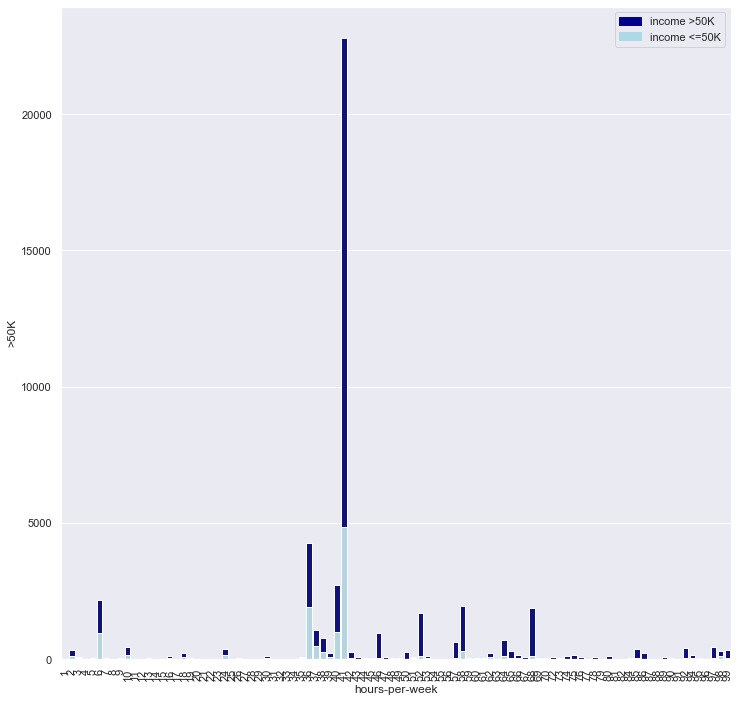

In [99]:
import matplotlib.patches as mpatches


plt.figure(figsize=(12, 12))


# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="hours-per-week",  y="total", data=df_hours_per_week_income, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="hours-per-week", y=">50K", data=df_hours_per_week_income, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='income >50K')
bottom_bar = mpatches.Patch(color='lightblue', label='income <=50K')
plt.legend(handles=[top_bar, bottom_bar])

plt.tick_params(axis='x', rotation=90)

# show the graph
plt.show()

<font color='blue'> As shown in the stacked bar chart, 40 hours per week group was the most popular reported group among individuals in the census. </font>

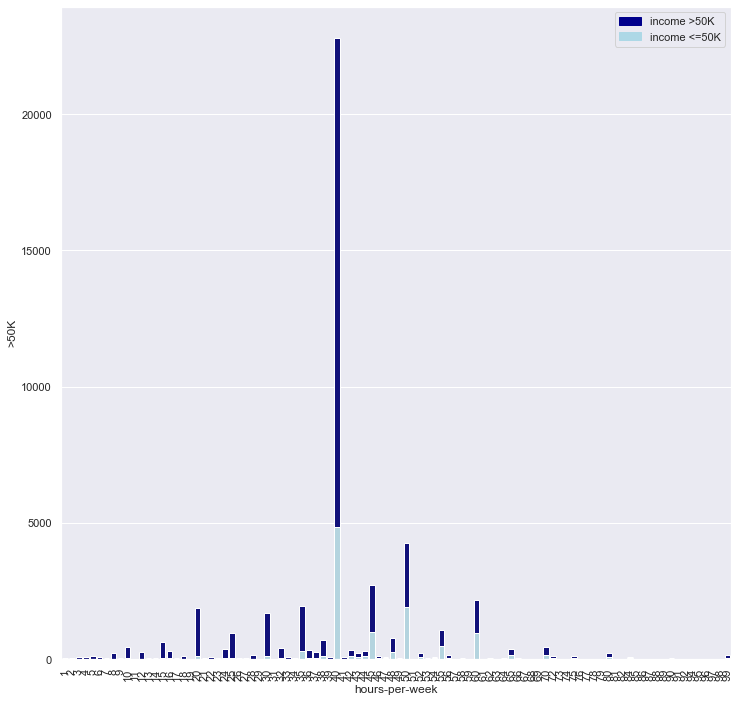

In [85]:
import matplotlib.patches as mpatches


plt.figure(figsize=(12, 12))


bar1 = sns.barplot(x="hours-per-week", 
                   y="total", 
                   data=, 
                   color='darkblue')


bar2 = sns.barplot(x="hours-per-week", 
                   y=">50K", 
                   data=df_hours_per_week_income.sort_values(['>50K_rate', 'total'], ascending=False), 
                   color='lightblue')


top_bar = mpatches.Patch(color='darkblue', label='income >50K')
bottom_bar = mpatches.Patch(color='lightblue', label='income <=50K')
plt.legend(handles=[top_bar, bottom_bar])

plt.tick_params(axis='x', rotation=90)

plt.show()

income,hours-per-week,<=50K,>50K,total,>50K_rate,<=50K_rate
0,1,24.0,3.0,27.0,0.111111,0.888889
1,2,41.0,12.0,53.0,0.226415,0.773585
2,3,56.0,3.0,59.0,0.050847,0.949153
3,4,78.0,6.0,84.0,0.071429,0.928571
4,5,86.0,9.0,95.0,0.094737,0.905263
5,6,82.0,10.0,92.0,0.108696,0.891304
6,7,38.0,7.0,45.0,0.155556,0.844444
7,8,199.0,19.0,218.0,0.087156,0.912844
8,9,24.0,3.0,27.0,0.111111,0.888889
9,10,392.0,33.0,425.0,0.077647,0.922353


In [84]:
df_hours_per_week_income.sort_values(['>50K_rate', 'total'])

income,hours-per-week,<=50K,>50K,total,>50K_rate,<=50K_rate
77,79,1.0,0.0,1.0,0.000000,1.000000
80,82,1.0,0.0,1.0,0.000000,1.000000
84,87,1.0,0.0,1.0,0.000000,1.000000
90,94,1.0,0.0,1.0,0.000000,1.000000
79,81,3.0,0.0,3.0,0.000000,1.000000
88,91,3.0,0.0,3.0,0.000000,1.000000
85,88,4.0,0.0,4.0,0.000000,1.000000
75,77,9.0,0.0,9.0,0.000000,1.000000
18,19,19.0,0.0,19.0,0.000000,1.000000
10,11,20.0,0.0,20.0,0.000000,1.000000


In [74]:
df_hours_per_week_income

income,hours-per-week,<=50K,>50K,total,>50K_rate,<=50K_rate
0,1,24.0,3.0,27.0,0.111111,0.888889
1,2,41.0,12.0,53.0,0.226415,0.773585
2,3,56.0,3.0,59.0,0.050847,0.949153
3,4,78.0,6.0,84.0,0.071429,0.928571
4,5,86.0,9.0,95.0,0.094737,0.905263
5,6,82.0,10.0,92.0,0.108696,0.891304
6,7,38.0,7.0,45.0,0.155556,0.844444
7,8,199.0,19.0,218.0,0.087156,0.912844
8,9,24.0,3.0,27.0,0.111111,0.888889
9,10,392.0,33.0,425.0,0.077647,0.922353


In [75]:
df_hours_per_week = df_adult.loc[:, 'hours-per-week'].value_counts().reset_index()
df_hours_per_week

,index,hours-per-week
0,40,22803
1,50,4246
2,45,2717
3,60,2177
4,35,1937
5,20,1862
6,30,1700
7,55,1051
8,25,958
9,48,770


In [76]:
df_hours_per_week = df_hours_per_week.rename(columns={'index':'hours-per-week', 'hours-per-week':'count'})
df_hours_per_week

,hours-per-week,count
0,40,22803
1,50,4246
2,45,2717
3,60,2177
4,35,1937
5,20,1862
6,30,1700
7,55,1051
8,25,958
9,48,770


In [77]:
df_hours_per_week[df_hours_per_week.loc[:, 'hours-per-week'] == 99]

,hours-per-week,count
29,99,137


In [78]:
df_adult[df_adult.loc[:, 'hours-per-week'] == 99]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bins
384,29,Private,211208,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,>50K,20-29
901,37,Private,112158,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,99,United-States,>50K,30-39
1121,31,Local-gov,378426,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,Columbia,<=50K,30-39
1156,48,?,117054,5th-6th,3,Divorced,?,Not-in-family,White,Male,0,0,99,United-States,<=50K,40-49
1649,52,Private,254680,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,99,United-States,<=50K,50-59
2078,33,State-gov,162705,Some-college,10,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,>50K,30-39
2392,34,Private,230246,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,2202,0,99,United-States,<=50K,30-39
2690,37,Local-gov,130805,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,99,United-States,>50K,30-39
3030,39,Private,187921,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,<=50K,30-39
3237,58,?,365410,Some-college,10,Separated,?,Other-relative,White,Female,0,0,99,United-States,<=50K,50-59


<AxesSubplot:xlabel='hours-per-week', ylabel='count'>

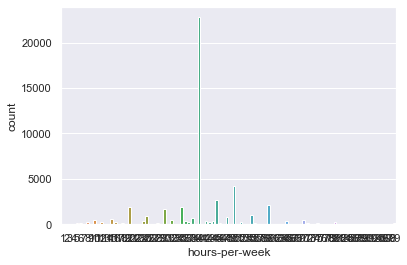

In [79]:
sns.barplot(x='hours-per-week', y='count', data=df_hours_per_week)

<AxesSubplot:xlabel='hours-per-week'>

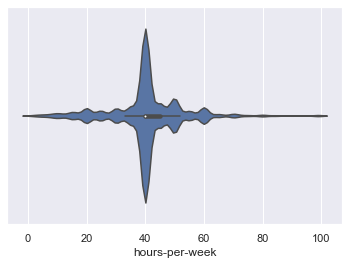

In [80]:
sns.violinplot(x="hours-per-week", data=df_adult)


<font color='blue'> Working 40 is the mode for hour-per-week and there is a left skew towards working more than 40 hours opposed to less than 40 hours. </font>

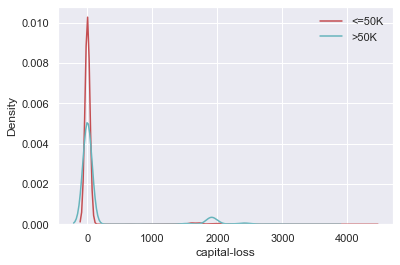

In [81]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '<=50K', :]['capital-loss'], 
                  shade=False, 
                  color="r", 
                  label='<=50K',
                  bw_method=.12)
#https://htmlcolorcodes.com/color-picker/

fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['capital-loss'], 
                  shade=False, 
                  color="#66B4BC", 
                  label='>50K',
                  bw_method=.12)

#https://stackoverflow.com/questions/68096271/how-to-color-different-seaborn-kdeplots-in-one-figure

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


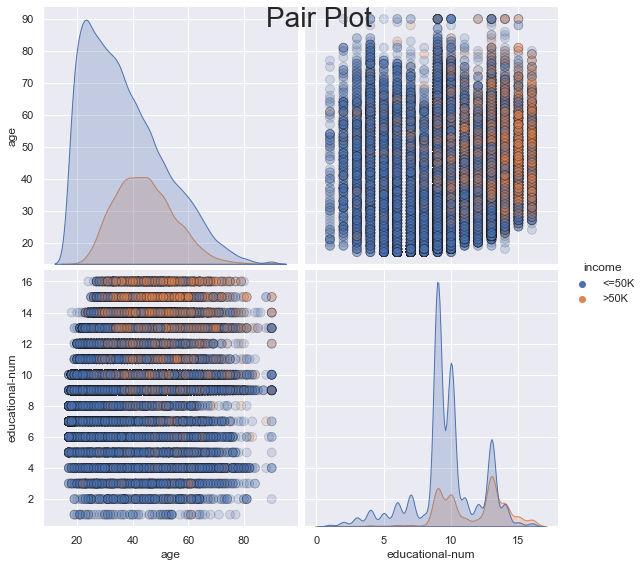

In [82]:
# Plot colored by continent for years 2000-2007
sns.pairplot(df_adult, 
             vars = ['age', 'educational-num'], 
             hue = 'income', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.2, 's': 80, 'edgecolor': 'k'},
             size = 4);
# Title 
plt.suptitle('Pair Plot', 
             size = 28);


#https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

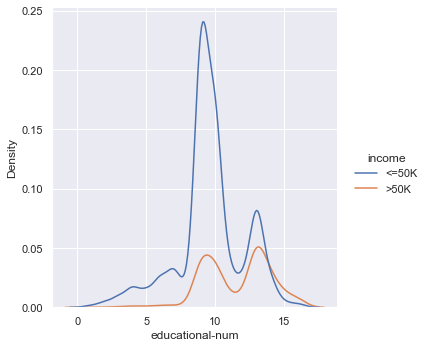

In [83]:
sns.displot(df_adult, x="educational-num", hue='income', kind="kde", bw_adjust=1.7)

#https://seaborn.pydata.org/tutorial/distributions.html

## 3.6 Summary<a id='3.6_Summary'></a>